# **6610210301 ภานุพงศ์ สนไชย**

# Lab02-2 - Image Representations (Part 2)

In this exercise, you will learn how to work with HSV and HSL color space. We will:

1. Load an image in RGB using Pillow.  
2. Convert from RGB to HSV and HSL.  
3. Visualize and manipulate each channel (Hue, Saturation, Value/Lightness).  
4. Build a simple color-threshold filter on the HSV/HSL representation.


## 2.10 Setup

First, make sure you have installed the required libraries and check what is your *present working directory*:

In [ ]:
!pip install numpy pillow
!echo "Your current directory is: $(pwd)"

Your current directory is: /content


## 2.11 Utility Function
You are provided a utility function for rendering images.

In [ ]:
import numpy as np
import colorsys
import cv2
# %matplotlib inline

# # Utility function to display an image
# def show(img_array, cmap=None, title=""):
#     plt.figure(figsize=(5,5))
#     plt.axis('off')
#     plt.title(title)
#     if cmap is None:
#         plt.imshow(img_array, vmin=0, vmax=255)
#     else:
#         plt.imshow(img_array, cmap=cmap, vmin=0, vmax=255)
#     plt.show()

# Utility function to display an image using OpenCV
from google.colab.patches import cv2_imshow

def show(img_array, title="Image"):
     if len(img_array.shape) == 3 and img_array.shape[2] == 3 :
         img_to_show = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
     else:
         img_to_show = img_array  # ไม่แปลง เช่น grayscale
     cv2_imshow(img_to_show)
     cv2.waitKey(0)
     cv2.destroyAllWindows()




## 2.12 Load and Display an RGB Image

We’ll load any `PNG`/`JPEG` into a PIL Image, convert to RGB and display.

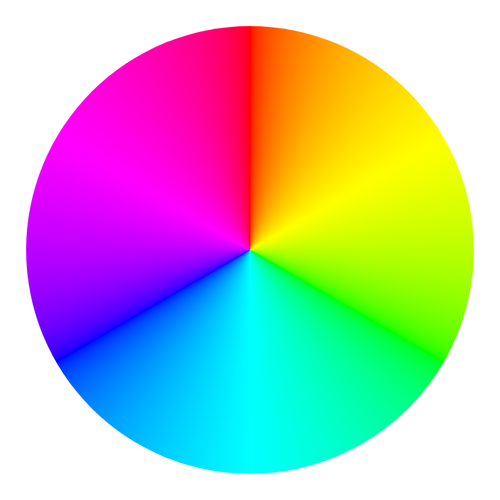

In [ ]:
# # Load with Pillow
# img_path = 'Linear_RGB_color_wheel.png'    # TODO: adjust path as needed
# img_rgb = Image.open(img_path).convert('RGB')

# # Convert to NumPy for manipulation
# rgb = np.array(img_rgb)           # shape (H, W, 3), uint8

# # Display
# show(rgb, title="Original RGB");

filename = 'Linear_RGB_color_wheel.png'
img_bgr = cv2.imread(filename)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_np = np.array(img)
show(img_np, title="Original RGB")


## 2.13 Convert to HSV and HSL

### Convert to HSV with Pillow

Pillow’s `convert('HSV')` produces H∈[0,255], S∈[0,255], V∈[0,255].


Type: <class 'numpy.ndarray'>
Dtype: uint8


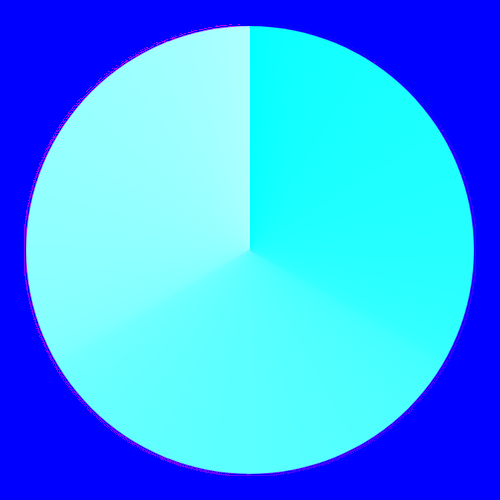

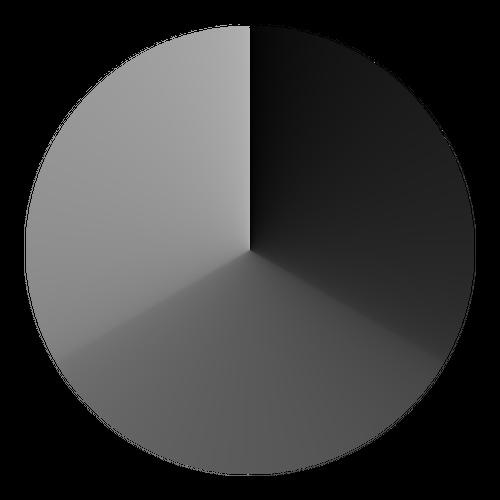

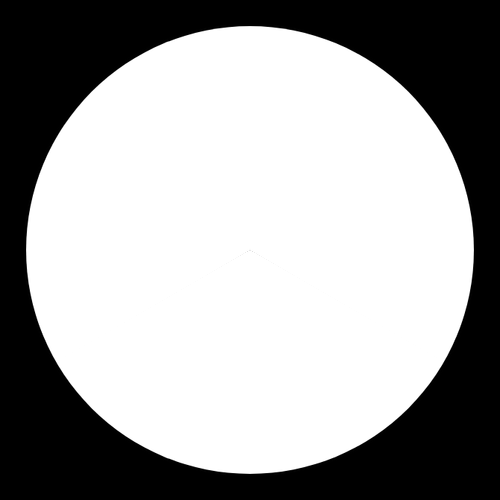

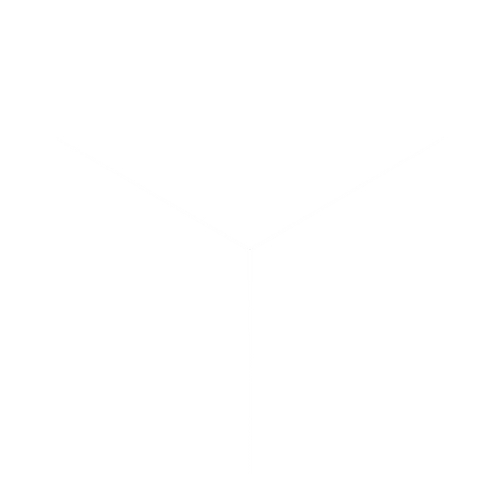

In [ ]:
# # Convert RGB to HSV using PIL
# img_hsv = img_rgb.convert('HSV')
# print(type(img_hsv))
# hsv = np.array(img_hsv)   # uint8
# print(type(hsv))
# # Extract channels
# H = hsv[:, :, 0]
# S = hsv[:, :, 1]
# V = hsv[:, :, 2]

# # Display
# show(hsv, title="HSV") # show h in chanal r s in g v in b
# show(H, cmap="hsv", title="H Channel")
# show(S, cmap="gray", title="S Channel")
# show(V, cmap="gray", title="V Channel")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
hsv = np.array(img_hsv)
print("Type:", type(img_hsv))          # numpy.ndarray
print("Dtype:", img_hsv.dtype)
H = hsv[:, :, 0]
S = hsv[:, :, 1]
V = hsv[:, :, 2]

show(img_hsv, "HSV")
show(H, "H Channel")
show(S, "S Channel")
show(V, "V Channel")

### Convert to HSL manually (NumPy)

We normalize RGB→[0,1], then compute H, L, S according to standard formulas:


/tmp/ipython-input-46-3762108641.py:27: RuntimeWarning: invalid value encountered in divide
  H[mask_r]=(((g-b)[mask_r]/C[mask_r])%6)*60.0
/tmp/ipython-input-46-3762108641.py:28: RuntimeWarning: invalid value encountered in divide
  H[mask_g]=(((b-r)[mask_g]/C[mask_g])+2)*60.0
/tmp/ipython-input-46-3762108641.py:29: RuntimeWarning: invalid value encountered in divide
  H[mask_b]=(((r-g)[mask_b]/C[mask_b])+4)*60.0
/tmp/ipython-input-46-3762108641.py:35: RuntimeWarning: invalid value encountered in cast
  H.astype('uint8'),


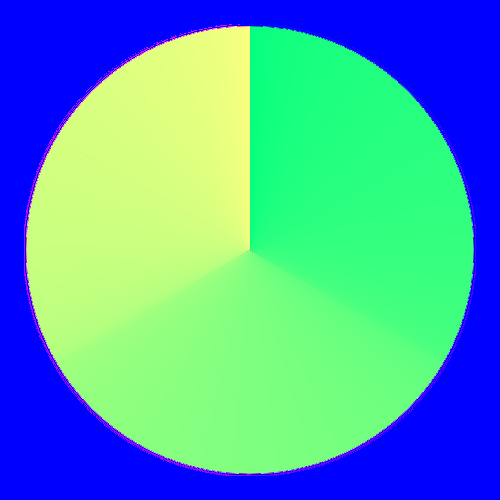

/usr/local/lib/python3.11/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


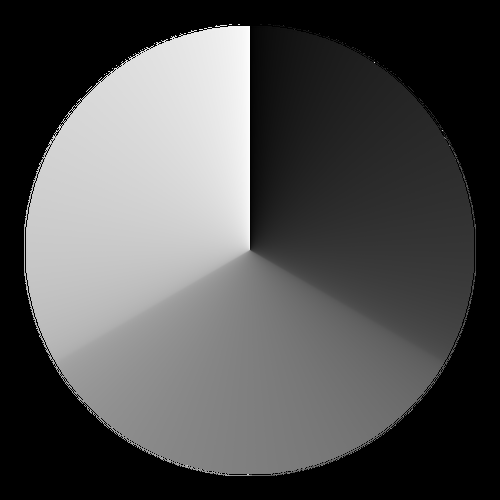

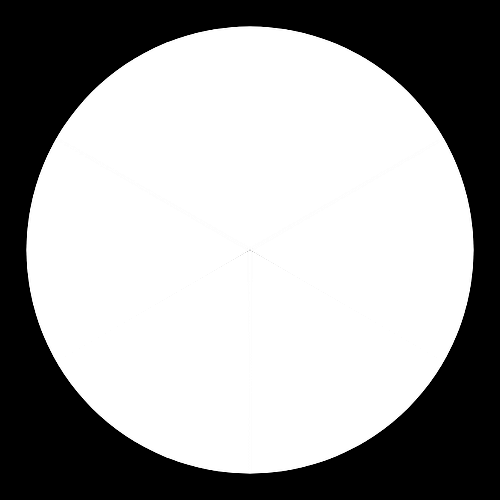

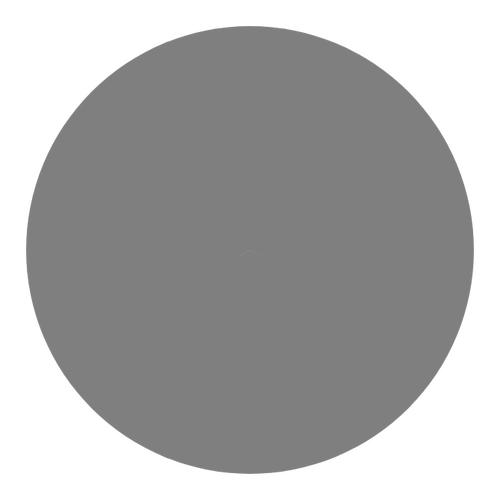

In [ ]:
# Normalize RGB from [0,255] to [0,1]
rgb_norm = img.astype('float32') / 255.0
r, g, b = rgb_norm[...,0], rgb_norm[...,1], rgb_norm[...,2]

# TODO: Find Xmax, Xmin, and C
xmax =np.max(rgb_norm,axis=2)
# xmax = max(r,g,b)
xmin = np.min(rgb_norm,axis=2)
# xmin = min(r,g,b)
C = xmax-xmin

# TODO: Lightness (0-1)
L = (xmax+xmin)/2

# TODO: Saturation (0-1)
# Caution: avoid division by zero
S=np.zeros_like(C)
mask=(L>0.0)&(L<1.0)
S [mask]= C[mask]/1-np.abs(2*L[mask]-1)

# TODO: Hue (0–360°)
H = np.zeros_like(C)
mask_r=(xmax==r)
mask_g=(xmax==g)
mask_b=(xmax==b)

H[mask_r]=(((g-b)[mask_r]/C[mask_r])%6)*60.0
H[mask_g]=(((b-r)[mask_g]/C[mask_g])+2)*60.0
H[mask_b]=(((r-g)[mask_b]/C[mask_b])+4)*60.0
# Scale H from [0,360] to [0,255] for 8-bit image
H = H / 360.0 * 255.0

# Stack to uint8 HSL
hsl = np.stack([
    H.astype('uint8'),
    (S * 255).astype('uint8'),
    (L * 255).astype('uint8')
], axis=2)

# Display
show(hsl, title="HSL")
show(H, title="H Channel")
show(S*255, title="S Channel")
show(L*255, title="L Channel")

In [ ]:
x=np.array([1,2,3,4,5])
np.abs(x)

array([1, 2, 3, 4, 5])

## 2.14 Manipulating Channels

Try these:

1. Increase V by +50 (clip to 255).  
2. Decrease S by 50%.  
3. Rotate Hue by +30 (wrap at 255).  
4. Convert back to RGB and display.


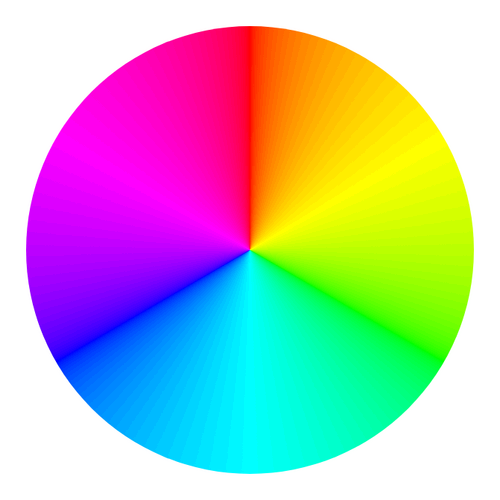

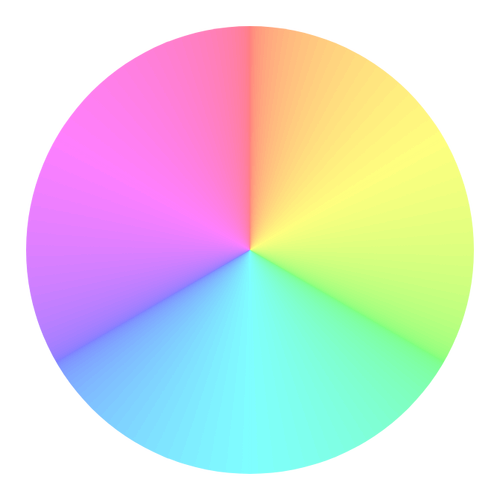

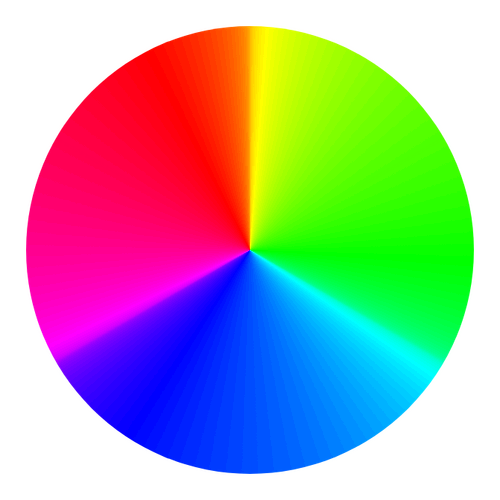

In [ ]:
# helpers
# def hsv_to_rgb_pil(hsv_array):
#     """Take uint8 HSV array shape (H,W,3), return uint8 RGB."""
#     pil = Image.fromarray(hsv_array, mode='HSV').convert('RGB')
#     return np.array(pil)

def hsv_to_rgb_opencv(hsv_array):
    rgb = cv2.cvtColor(hsv_array, cv2.COLOR_HSV2RGB)
    return rgb

# TODO: Increase V by 50
hsv_inc_v=hsv.copy()
hsv_inc_v[...,2] = np.clip(hsv[:,:,2].astype(int)+50,0,255).astype(np.uint8)

rgb_out = hsv_to_rgb_opencv(hsv_inc_v)
show(rgb_out, title="V +50")

# TODO: Decrease S by 50%
hsv_dec_s=hsv.copy()
hsv_dec_s[...,1]= np.clip(hsv[:,:,1].astype(int)*0.5,0,255).astype(np.uint8)

rgb_out = hsv_to_rgb_opencv(hsv_dec_s)
show(rgb_out, title="S ×0.5")

# TODO: Rotate H by 30°
hsv_rot_h=hsv.copy()
hue_shift=int(30/360*255)
hsv_rot_h[...,0] = ((hsv[:,:,0].astype(int)+hue_shift)%256).astype(np.uint8)

rgb_out = hsv_to_rgb_opencv(hsv_rot_h)
show(rgb_out, title="H +30°")


## 2.15 Color-Threshold Filter in HSV

Goal: isolate a specific color range—for example, a green object.

1. Define lower/upper HSV bounds for green.  
2. Create a binary mask.  
3. Apply mask to original image.


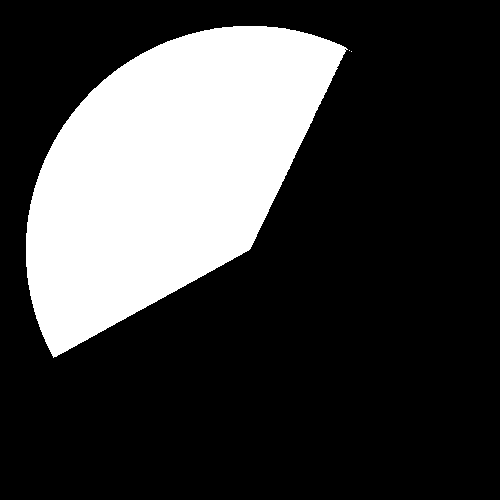

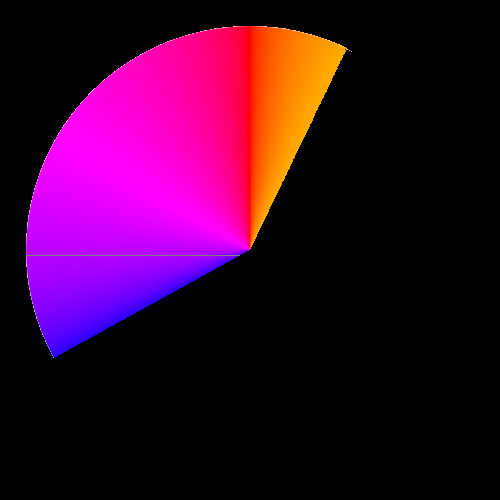

In [68]:
# TODO: Define green thresholds
# Hue ~ 35–85
# Saturation > 50
# Value > 50

# lower = np.array([200, 250, 0], dtype='uint8')
# upper = np.array([20, 255, 255], dtype='uint8')
lower1 = np.array([125,50,50],dtype='uint8')
upper1 = np.array([179,255,255],dtype="uint8")
mask1=cv2.inRange(hsv,lower1,upper1)
# lower2 = np.array([0, 50, 50], dtype='uint8')  # แดง
# upper2 = np.array([15, 255, 255], dtype='uint8')  # ส้มอ่อน (H~30°)
lower2 = np.array([0,50,50],dtype='uint8')
upper2 = np.array([20,255,255],dtype="uint8")
mask2=cv2.inRange(hsv,lower2,upper2)
mask=cv2.bitwise_or(mask1,mask2)
# Create mask
# mask = ((hsv[:,:,0]>lower1[0])&(hsv[:,:,0]<=upper1[0])&
#         (hsv[:,:,1]>lower1[1])&(hsv[:,:,1]<=upper1[1])&
#         (hsv[:,:,2]>lower1[2])&(hsv[:,:,2]<=upper1[2])|
#         (hsv[:,:,0]>lower2[0])&(hsv[:,:,0]<=upper2[0])&
#         (hsv[:,:,1]>lower2[1])&(hsv[:,:,1]<=upper2[1])&
#         (hsv[:,:,2]>lower2[2])&(hsv[:,:,2]<=upper2[2])
#         )



# Create filtered image
filtered_img = img_rgb.copy()
filtered_img[~mask] = [127, 127, 127]  # Gray out pixels outside the threshold
result=cv2.bitwise_and(filtered_img,filtered_img,mask=mask)
show(mask, title="Color Threshold Mask")
show(result)
# actually i dont know why the result not like my expect but i copy you already